In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

### <a href="https://klue-benchmark.com/">KLUE</a>
- 연구용 데이터 셋


In [4]:
# read_json 으로 url 불러오기
# 연합뉴스 기사 타이틀
url = "https://raw.githubusercontent.com/KLUE-benchmark/KLUE/main/klue_benchmark/ynat-v1.1/ynat-v1.1_train.json"

df = pd.read_json(url)
df.head()


,guid,title,predefined_news_category,label,annotations,url,date
0,ynat-v1_train_00000,유튜브 내달 2일까지 크리에이터 지원 공간 운영,IT과학,생활문화,"{'annotators': ['08', '13', '07'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2016.06.30. 오전 10:36
1,ynat-v1_train_00001,어버이날 맑다가 흐려져…남부지방 옅은 황사,생활문화,생활문화,"{'annotators': ['14', '13', '07'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2016.05.08. 오전 5:25
2,ynat-v1_train_00002,내년부터 국가RD 평가 때 논문건수는 반영 않는다,IT과학,사회,"{'annotators': ['14', '13', '10'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2016.03.15. 오후 12:00
3,ynat-v1_train_00003,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것,IT과학,사회,"{'annotators': ['16', '11', '15'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2017.02.28. 오전 9:54
4,ynat-v1_train_00004,회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간,생활문화,생활문화,"{'annotators': ['03', '02', '12'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2018.04.03. 오전 7:05


In [5]:
# 행,열 파악

df.shape

(45678, 7)

In [6]:
# 중복 데이터가 있는지 확인

df.duplicated(subset=['title'])

0        False
1        False
2        False
3        False
4        False
         ...  
45673    False
45674    False
45675    False
45676    False
45677    False
Length: 45678, dtype: bool

In [7]:
# 결측치 확인
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45678 entries, 0 to 45677
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   guid                      45678 non-null  object
 1   title                     45678 non-null  object
 2   predefined_news_category  45678 non-null  object
 3   label                     45678 non-null  object
 4   annotations               45678 non-null  object
 5   url                       45678 non-null  object
 6   date                      45678 non-null  object
dtypes: object(7)
memory usage: 2.4+ MB


guid                        0
title                       0
predefined_news_category    0
label                       0
annotations                 0
url                         0
date                        0
dtype: int64

### 텍스트 길이 분석

In [8]:
# 타이틀 길이를 구해서 새로운 컬럼(title_len) 생성

df['title_len'] = df['title'].str.len()

In [9]:
# 토큰 개수(공백 기준으로) : title_token_count
df['title_token_count'] = df['title'].str.split().str.len()

In [10]:
# 확인
df.head(2)

,guid,title,predefined_news_category,label,annotations,url,date,title_len,title_token_count
0,ynat-v1_train_00000,유튜브 내달 2일까지 크리에이터 지원 공간 운영,IT과학,생활문화,"{'annotators': ['08', '13', '07'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2016.06.30. 오전 10:36,26,7
1,ynat-v1_train_00001,어버이날 맑다가 흐려져…남부지방 옅은 황사,생활문화,생활문화,"{'annotators': ['14', '13', '07'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2016.05.08. 오전 5:25,23,5


In [11]:
# 타이틀 길이와 토근 개수 컬럼만으로 기술통계 요약 정보 보기

df[['title_len','title_token_count']].describe()

,title_len,title_token_count
count,45678.000000,45678.000000
mean,27.366544,6.611213
std,4.864236,1.460011
min,4.000000,1.000000
25%,25.000000,6.000000
50%,28.000000,7.000000
75%,31.000000,8.000000
max,44.000000,13.000000


In [12]:
# 텍스트 길이가 가장 짧은 기사는?

df[df['title_len'] == 4]
df[df['title_len'] == df['title_len'].min()]

,guid,title,predefined_news_category,label,annotations,url,date,title_len,title_token_count
4343,ynat-v1_train_04343,봄 산책,생활문화,생활문화,"{'annotators': ['12', '10', '13'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2018.04.05. 오후 1:51,4,2


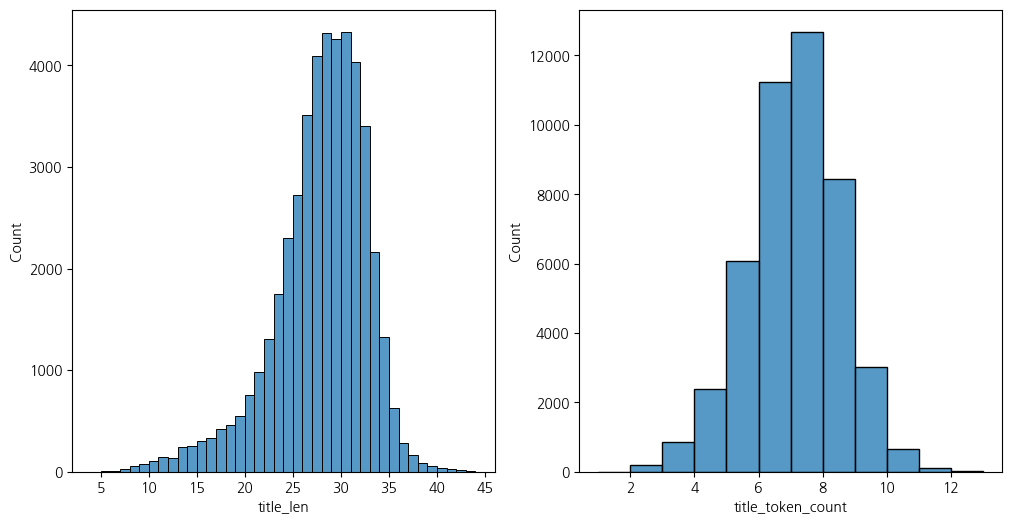

In [13]:
# 히스토그램
fig, ax = plt.subplots(1, 2, figsize=(12,6))
sns.histplot(data=df, x='title_len', ax=ax[0], binwidth=1)
sns.histplot(data=df, x='title_token_count', ax=ax[1], binwidth=1);

In [14]:
fig = make_subplots(rows=1, cols=2, subplot_titles=['title_len','title_token_count'])

fig.add_trace(go.Histogram(x=df['title_len'], showlegend=False), row=1, col=1)
fig.add_trace(go.Histogram(x=df['title_token_count'], showlegend=False), row=1, col=2)
fig.update_layout(width=600, height=400)
fig.show()

In [15]:
# 텍스트 길이가 가장 긴 기사는?

df[df['title_len'] == df['title_len'].max()]

,guid,title,predefined_news_category,label,annotations,url,date,title_len,title_token_count
5792,ynat-v1_train_05792,美기준금리 0.25%p 인상→0.50%∼0.75%…내년 3차례 인상 시사종합2보,세계,세계,"{'annotators': ['02', '18', '03'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2016.12.15. 오전 5:10,44,6
20168,ynat-v1_train_20168,그래픽 네이처 세계 연구기관 2017년 평가 발표…서울대 국내 1위·세계 70위,IT과학,사회,"{'annotators': ['12', '07', '14'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2017.09.14. 오후 2:43,44,10
28257,ynat-v1_train_28257,주말 N 여행 영남권 겨울바다 낭만…부산 갈맷길 1∼3코스 89.2㎞ 절경 즐비,생활문화,생활문화,"{'annotators': ['14', '07', '15'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2016.12.09. 오전 11:00,44,11
30493,ynat-v1_train_30493,MWC 2018 갤S9 64GB 출고가 95만7천원…자급제 포함 28일 예약판매,IT과학,IT과학,"{'annotators': ['13', '10', '08'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2018.02.26. 오전 11:00,44,9


### 워드 클라우드 시각화
- https://github.com/amueller/word_cloud

  


In [6]:
# 시리즈 형태로 되어 있는 건  안됨
# title 모두 연결
news_title = " ".join(df['title'])
news_title[:100]

NameError: name 'df' is not defined

In [5]:
from wordcloud import WordCloud

wc = WordCloud()
wc.generate(news_title)

plt.figure(figsize=(10,6))
plt.axis('off')
plt.imshow(wc, interpolation='bilinear')
plt.show()

NameError: name 'news_title' is not defined

In [18]:
# 워드 클라우드 작성 함수

font_path = r"c:/windows/Fonts/malgun.ttf"

def display_word_cloud(data, width=1200, height=500):
    wc = WordCloud(font_path=font_path,
                    width=width, 
                    height=height, 
                    random_state=42, 
                    background_color='white').generate(data)

    plt.figure()
    plt.axis('off')
    plt.imshow(wc, interpolation='bilinear')
    plt.show()

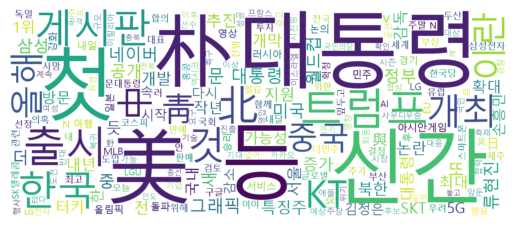

In [19]:
display_word_cloud(news_title)

In [20]:
# 불용어 처리까지 들어간 워드 클라우드 함수
stopwords = ['하지만','그리고','그런데','저는','제가','이런','그럼','저런',
             '합니다','많은','많이','정말','너무','수','등','것']

def display_word_cloud(data, width=1200, height=500):
    wc = WordCloud(font_path=font_path,
                    width=width, 
                    height=height, 
                    random_state=42, 
                    stopwords=stopwords,
                    background_color='white').generate(data)

    plt.figure()
    plt.axis('off')
    plt.imshow(wc, interpolation='bilinear')
    plt.show()

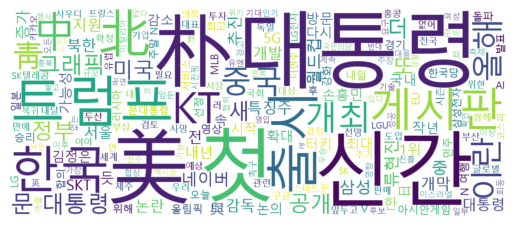

In [21]:
display_word_cloud(news_title)

### 레이블

In [22]:
# 레이블 파악

df['label'].unique()

array(['생활문화', '사회', 'IT과학', '스포츠', '세계', '정치', '경제'], dtype=object)

In [23]:
# 레이블 별 개수 파악
df['label'].value_counts()

label
세계      8320
스포츠     7742
정치      7379
경제      6118
생활문화    5751
IT과학    5235
사회      5133
Name: count, dtype: int64

In [24]:
# 세계 기사만 가져오기
subject_title = " ".join(df.loc[df['label'] == '세계','title'])

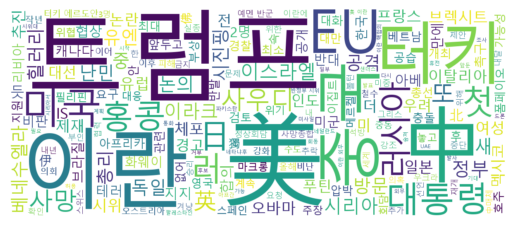

In [25]:
# 세계 기사 워드클라우드

display_word_cloud(subject_title)

### [실습] 생활문화 레이블 가져와서 워드 클라우드 작성하기

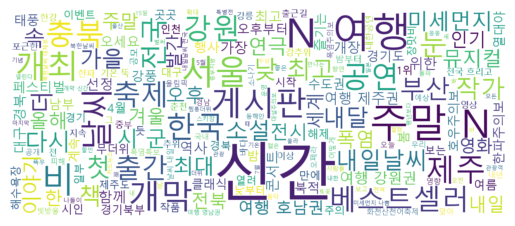

In [26]:
subject_title = " ".join(df.loc[df['label'] == '생활문화','title'])
display_word_cloud(subject_title)

### 정규표현식

In [27]:
df['title']

0              유튜브 내달 2일까지 크리에이터 지원 공간 운영
1                 어버이날 맑다가 흐려져…남부지방 옅은 황사
2             내년부터 국가RD 평가 때 논문건수는 반영 않는다
3         김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것
4          회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간
                       ...               
45673        사우디 아람코 주요 석유시설·유전 드론 공격에 화재
45674      박기원 감독 눈치 보지 말고…비예나 눈치 본 건 아닌데
45675    아시안게임 첫 경기 앞둔 라건아 인도네시아 팬이라도 ...
45676       트럼프 미중 무역협상 1단계 합의 서명식 가질 것종합
45677    극적 역전승 도로공사 GS칼텍스 꺾고 2년 연속 챔프...
Name: title, Length: 45678, dtype: object

In [28]:
# 숫자 제거

df['title2'] = df['title'].str.replace(r"\d","",regex=True)

In [29]:
# 한문 제거
# 한글 가-힣

df['title3'] = df['title'].str.replace(r"[^ㄱ-ㅎ ㅏ-ㅣ 가-힣 a-zA-Z]","",regex=True)

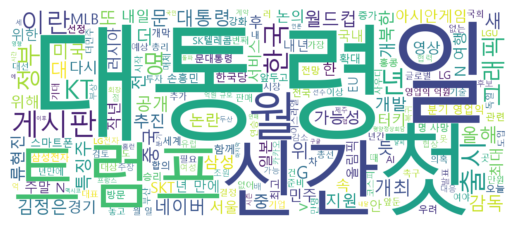

In [30]:
# news_title = " ".join(df['title2'])
news_title = " ".join(df['title3'])
display_word_cloud(news_title)

## 형태소 분석기로 특정 품사만 추출하기

### Pecab
- 일본어 형태소 분석기 Mecab 를 한국어 형태소 분석기로 작성
- https://github.com/hyunwoongko/pecab

In [ ]:
# !pip install pecab
# !pip install tqdm

     ---------------------------------------- 0.0/26.4 MB ? eta -:--:--
     --------------- ----------------------- 10.5/26.4 MB 53.3 MB/s eta 0:00:01
     --------------------------- ----------- 18.9/26.4 MB 47.9 MB/s eta 0:00:01
     ------------------------------------- - 25.4/26.4 MB 42.6 MB/s eta 0:00:01
     --------------------------------------- 26.4/26.4 MB 35.0 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/25.7 MB ? eta -:--:--
   ----------------- ---------------------- 11.0/25.7 MB 51.9 MB/s eta 0:00:01
   ------------------------------ --------- 19.4/25.7 MB 45.8 MB/s eta 0:00:01
   ---------------------------------------  25.4/2

In [7]:
from pecab import PeCab
pecab = PeCab()

In [10]:
# 명사 추출 : nouns()
pecab.nouns("자장면을 먹을까? 짬뽕을 먹을까? 그것이 고민이로다.")

['자장면', '짬뽕', '그것', '고민']

In [11]:
# 기사 제목 명사 추출

pecab.nouns(df.loc[5792,'title'])

NameError: name 'df' is not defined

In [9]:
# 사회 기사 타이틀 명사 추출

df_society = df.loc[df['label'] =='사회'].sample(1000, random_state=42)
df_society.head()

NameError: name 'df' is not defined

In [8]:
# df_society['title_nouns'] = df_society['title'].map(lambda x:pecab.nouns(x))

from tqdm import tqdm
tqdm.pandas()
df_society['title_nouns'] = df_society['title'].progress_map(lambda x:" ".join(pecab.nouns(x)))

NameError: name 'df_society' is not defined

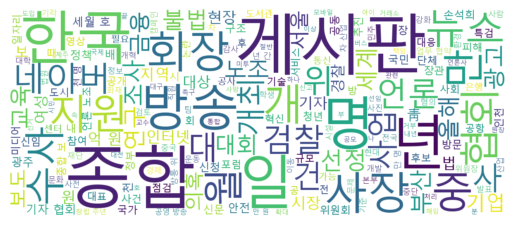

In [39]:
df_society['title_nouns']

# 세계 기사 중 명사 추출 후 워드 클라우드 작성
display_word_cloud(" ".join(df_society['title_nouns']))

## 워드 클라우드 마스크 처리
- https://github.com/amueller/word_cloud/blob/main/examples/masked.py

In [2]:
# 마스크 이미지 다운로드

import requests
from PIL import Image

mask_img_path = "https://raw.githubusercontent.com/amueller/word_cloud/main/examples/alice_mask.png"

res = requests.get(mask_img_path)

if res.status_code == 200:
    with open("./data/mask_img.png", "wb") as f:
        f.write(res.content)  # content(byte 코드로 가져옴)

In [41]:
mask_img = np.array(Image.open("./data/mask_img.png"))

In [42]:
def display_word_cloud_mask(data, width=1200, height=500, mask=mask_img, stopwords=stopwords):
    wc = WordCloud(font_path=font_path,
                    width=width, 
                    height=height, 
                    random_state=42, 
                    mask=mask,
                    stopwords=stopwords,
                    background_color='white').generate(data)

    plt.figure()
    plt.axis('off')
    plt.imshow(wc, interpolation='bilinear')
    plt.show()

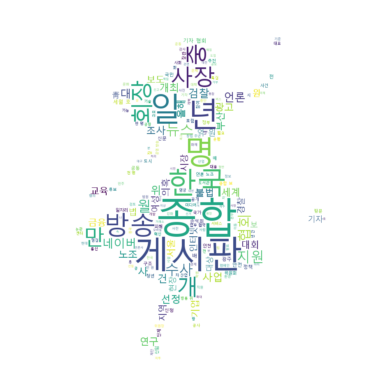

In [43]:
display_word_cloud_mask(" ".join(df_society['title_nouns']))

In [44]:
mask_img_path ='https://thepracticaldev.s3.amazonaws.com/i/u6otn211fuhgzwtpuivb.png'

res = requests.get(mask_img_path)

if res.status_code == 200:
    with open("./data/apple_img.png", "wb") as f:
        f.write(res.content)  # content(byte 코드로 가져옴)

In [1]:
# 스포츠 레이블의 명사 추출 후 워드클라우드(애플이미지) 작성

# 워드클라우드 이미지 로드
apple_img = np.array(Image.open("./data/apple_img.png"))

# 스포츠 레이블을 가진 df 생성
df_sports = df.loc[df['label'] =='스포츠'].sample(1000, random_state=42)
tqdm.pandas()

# 명사 추출 후 새 컬럼성 생성
df_sports['title_nouns'] = df_sports['title'].progress_map(lambda x:" ".join(pecab.nouns(x)))

# display_word_cloud_mask()
display_word_cloud_mask(data=" ".join(df_sports['title_nouns']), mask=apple_img)

NameError: name 'np' is not defined